In [2]:
# Cell to load dataset, only run once since dataset is very very large
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

print("starting")
df_total = pd.read_csv('Data/Flights.csv')
df_temp1 = df_total[df_total['ORIGIN_AIRPORT'] == 'BOS']
df_temp2 = df_temp1[df_temp1['CANCELLED'] == 0]
df = df_temp2[df_temp2['DIVERTED'] == 0]
print("DONE")

starting


/var/folders/6t/hqt0dlv94t756tpd5mb94c4m0000gn/T/ipykernel_83438/953424997.py:7: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv('Data/Flights.csv')


DONE


In [3]:
# Our prediction task is estimating delay so we do not care about cancellation. In addition, all data from year
# and origin airport is the same so we remove it
df = df.drop(['CANCELLED', 'DIVERTED', 'CANCELLATION_REASON', 'YEAR', 'ORIGIN_AIRPORT'], axis = 1)
print(df.shape)
print(df.columns)
print(df.dtypes)

(104804, 26)
Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEEL

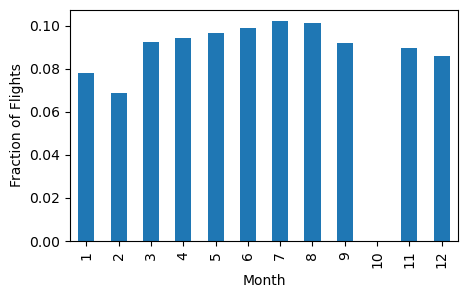

In [4]:
# Really weird that we missing ALL flights from october
plt.figure(figsize=(5,3))
correct_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pd.value_counts(df['MONTH'], normalize=True).reindex(correct_order).plot.bar()
plt.ylabel('Fraction of Flights')
plt.xlabel('Month')
plt.show()

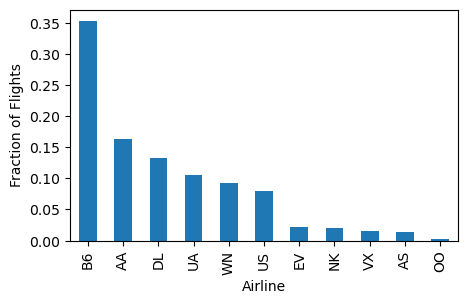

In [5]:
# Remember to look at airline cv for airline codes
plt.figure(figsize=(5,3))
pd.value_counts(df['AIRLINE'], normalize=True).plot.bar()
plt.ylabel('Fraction of Flights')
plt.xlabel('Airline')
plt.show()
correct_order_airline = ['B6', 'AA', 'DL', 'UA', 'WN', 'US', 'EV', 'NK', 'VX', 'AS', 'OO']

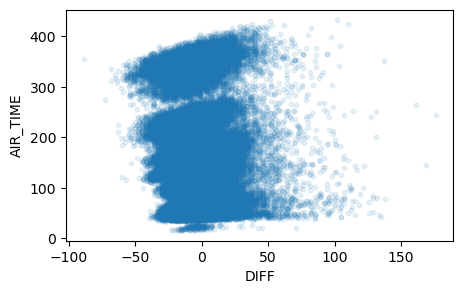

In [203]:
# Scatter plot looking at whether we make up time while flying
col = df['ARRIVAL_DELAY'] - df['DEPARTURE_DELAY']
df_pl = df.copy()
df_pl['DIFF'] = col

df_pl.plot.scatter('DIFF','AIR_TIME',figsize=(5,3),alpha=0.1,s=10) # alpha=0.1,s=10
plt.show()



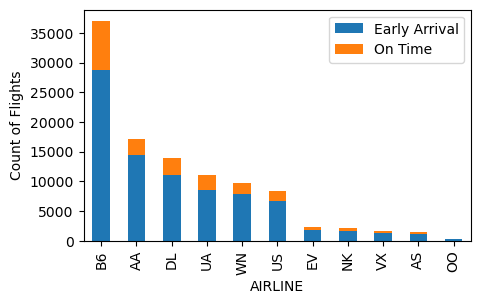

In [204]:
# Stacked bar graphs showing delays based on airline
df_temp = df.copy()
df_temp.loc[df['ARRIVAL_DELAY'] < 15, 'ARRIVAL_DELAY'] = -1
df_temp.loc[df['ARRIVAL_DELAY'] >= 15, 'ARRIVAL_DELAY'] = 1

count_matrix = df_temp.groupby(['AIRLINE', 'ARRIVAL_DELAY']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix.reindex(correct_order_airline).plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Count of Flights')
mylabels = ['Early Arrival', 'On Time', 'Delayed Arrival']
plt.legend(loc=1, labels=mylabels)
plt.show()

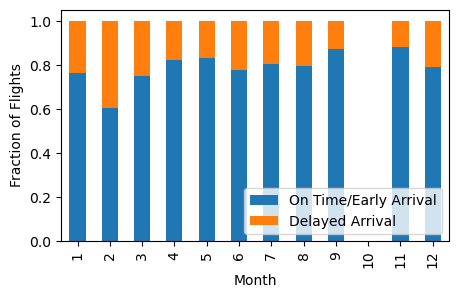

In [205]:
# Stacked bar graph shwoing delays based on month
count_matrix = df_temp.groupby(['MONTH', 'ARRIVAL_DELAY']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.reindex(correct_order).plot(kind='bar', stacked=True,figsize=(5,3))
plt.ylabel('Fraction of Flights')
plt.xlabel('Month')
mylabels = ['On Time/Early Arrival', 'Delayed Arrival']
plt.legend(loc=4, labels=mylabels)
plt.show()

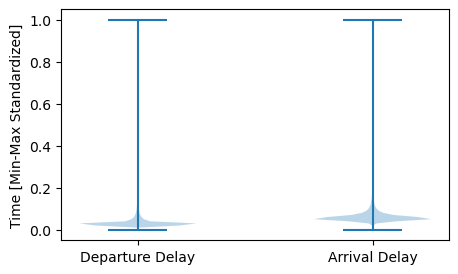

In [206]:
# Standardized violon graph showing arrival and departure delay. Due to outliers pretty useless
ormalized_df = (df['DEPARTURE_DELAY']-df['DEPARTURE_DELAY'].min())/(df['DEPARTURE_DELAY'].max() - df['DEPARTURE_DELAY'].min())
normalized_df2 =(df['ARRIVAL_DELAY']-df['ARRIVAL_DELAY'].min())/(df['ARRIVAL_DELAY'].max() - df['ARRIVAL_DELAY'].min())
dataset = [normalized_df.values,
           normalized_df2.values]
plt.figure(figsize=(5,3))
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Departure Delay','Arrival Delay'])
plt.ylabel('Time [Min-Max Standardized]')
plt.show()

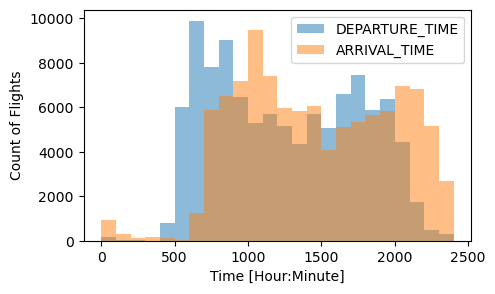

In [40]:
# Overlayed bar graph showing departure and arrival times
categories = ['DEPARTURE_TIME', 'ARRIVAL_TIME']
bin_range = (df['DEPARTURE_TIME'].min(),df['DEPARTURE_TIME'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[c],alpha=0.5,label=c,range=bin_range,bins=24)
plt.legend()
plt.ylabel('Count of Flights')
plt.xlabel('Time [Hour:Minute]')
plt.show()


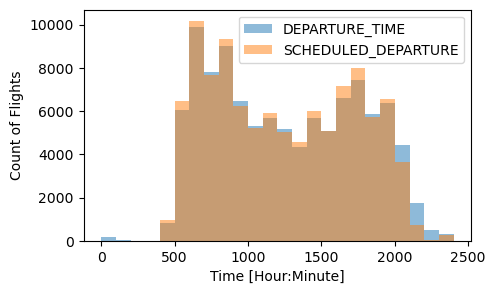

In [71]:
# Overlayed bar graph showing departure and schedule departures. Pretty useless since often planes can leave early
categories = ['DEPARTURE_TIME', 'SCHEDULED_DEPARTURE']
bin_range = (df['DEPARTURE_TIME'].min(),df['DEPARTURE_TIME'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[c],alpha=0.5,label=c,range=bin_range,bins=24)
plt.legend()
plt.ylabel('Count of Flights')
plt.xlabel('Time [Hour:Minute]')
plt.show()

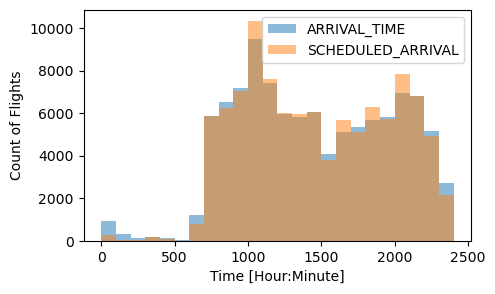

In [72]:
# Graph showing arrival time and scheduled. Overall not useful
categories = ['ARRIVAL_TIME', 'SCHEDULED_ARRIVAL']
bin_range = (df['ARRIVAL_TIME'].min(),df['ARRIVAL_TIME'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[c],alpha=0.5,label=c,range=bin_range,bins=24)
plt.legend()
plt.ylabel('Count of Flights')
plt.xlabel('Time [Hour:Minute]')
plt.show()

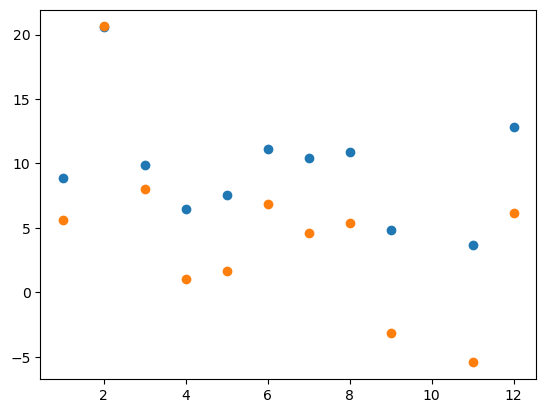

In [88]:
# Dot plot showing average departure and arrival delay per month
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
lines = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY']
line1 = []
line2 = []
for i in months:
    temp = df[df['MONTH'] == i]
    line1.append(temp['DEPARTURE_DELAY'].mean())
    line2.append(temp['ARRIVAL_DELAY'].mean())

plt.scatter(months, line1)
plt.scatter(months, line2)

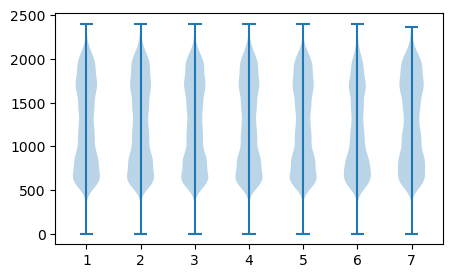

In [207]:
# Violin plot showing departure time per day of thre week
dataset = [df[df['DAY_OF_WEEK']== 1]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 2]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 3]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 4]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 5]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 6]['DEPARTURE_TIME'].values,
           df[df['DAY_OF_WEEK']== 7]['DEPARTURE_TIME'].values]

plt.figure(figsize=(5,3))

plt.violinplot(dataset = dataset)
plt.show()

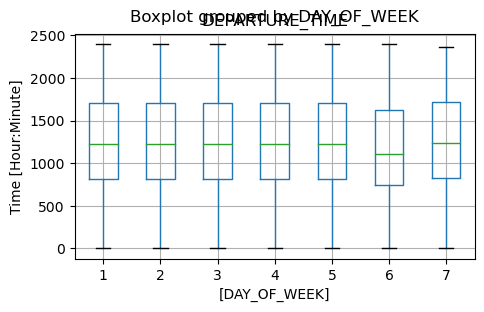

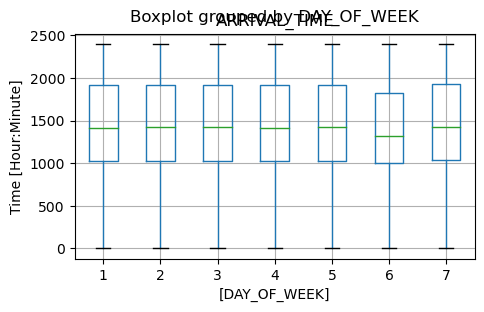

In [208]:
# Box plot showing average departure time depending on day of the week
df[['DAY_OF_WEEK','DEPARTURE_TIME']].boxplot(by='DAY_OF_WEEK',figsize=(5,3))
plt.ylabel('Time [Hour:Minute]')
plt.show()

df[['DAY_OF_WEEK','ARRIVAL_TIME']].boxplot(by='DAY_OF_WEEK',figsize=(5,3))
plt.ylabel('Time [Hour:Minute]')
plt.show()

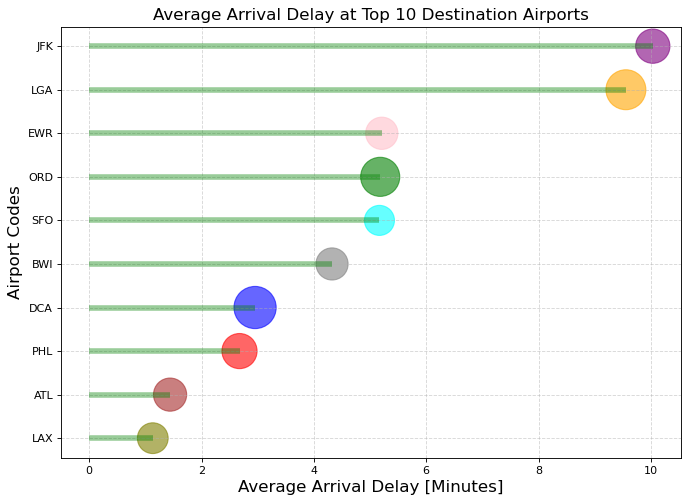

In [202]:
# Horizontal Line plot sh
airport = df['DESTINATION_AIRPORT'].value_counts()[0:10]
aa = []
for i in airport:
    aa.append(i/np.sum(airport)*10000)
    
top_airports = ['DCA', 'LGA', 'ORD', 'PHL', 'JFK', 'ATL', 'EWR', 'BWI', 'LAX', 'SFO']
mean_list = []
for i in top_airports:
    temp = df[df['DESTINATION_AIRPORT'] == i]
    mean_list.append(temp['ARRIVAL_DELAY'].mean())

df_bar = pd.DataFrame({'AIRPORT': top_airports})
df_bar['MEAN'] = mean_list
df_bar['colors'] = ['red' if x < 0 else 'green' for x in df_bar['MEAN']]
df_bar['colors2'] = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
df_bar['COUNT'] = aa
df_bar.sort_values('MEAN', inplace=True)
df_bar.reset_index(inplace=True)

# # # Draw plot
plt.figure(figsize=(10,7), dpi= 80)
plt.hlines(y=df_bar['AIRPORT'], xmin=0, xmax=df_bar.MEAN, color=df_bar.colors, alpha=0.4, linewidth=5)
plt.scatter(df_bar.MEAN, df_bar['AIRPORT'], color=df_bar.colors2, 
            s=df_bar['COUNT'], alpha=0.6)


# # Decorations
plt.title('Average Arrival Delay at Top 10 Destination Airports', fontdict={'size':15})
plt.ylabel("Airport Codes", fontdict={'size':15})
plt.xlabel("Average Arrival Delay [Minutes]", fontdict={'size':15})
plt.grid(linestyle='--', alpha=0.5)
plt.show()